In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#Visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import string

In [2]:
#import the dataset
df1=pd.read_csv("D:\Techmiya\PRoject\Datasets\hatespeech\labeled_data.csv")
df2=pd.read_csv("D:\Techmiya\PRoject\Datasets\hatespeech\distilBertOutput.csv")

In [3]:
df1.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
#Doing some adjustments

c=df1['class']
df1.rename(columns={'tweet' : 'text',
                   'class' : 'category'}, 
                    inplace=True)
a=df1['text']
b=df1['category'].map({0: 'hate_speech', 1: 'offensive_language',2: 'neither'})

df= pd.concat([a,b,c], axis=1)
df.rename(columns={'class' : 'label'}, 
                    inplace=True)
df

,text,category,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,neither,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive_language,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive_language,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive_language,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive_language,1
...,...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive_language,1
24779,"you've gone and broke the wrong heart baby, an...",neither,2
24780,young buck wanna eat!!.. dat nigguh like I ain...,offensive_language,1
24781,youu got wild bitches tellin you lies,offensive_language,1


In [5]:
# Grouping data by label
df.groupby('label').count()

,text,category
label,,
0,1430,1430
1,19190,19190
2,4163,4163


In [6]:
df2.head()

,Uid,Sentiment,clean_text
0,20803,neutral,_ Agr kse ko itni importantce chaeay ni tou ...
1,20187,neutral,logon ko alloo pyaz tomator me toh allah pak k...
2,20953,neutral,Wafadaar bane rahane ka nayab tarika hai lamb...
3,13777,negative,Chup bhosdike . He has been exonerated of al...
4,20990,positive,à¨¦à¨¾à¨¤à¨¾ à¨¸à:copyright:‹ à¨¸à¨¾à¨²à¨¾à¨...


In [7]:
#Replacing the values to ease understanding. (Assigning 1 to Positive sentiment 4)
df2['Sentiment'] = df2['Sentiment'].replace(['positive','negative','neutral'],[2,1,0])

In [8]:
df2

,Uid,Sentiment,clean_text
0,20803,0,_ Agr kse ko itni importantce chaeay ni tou ...
1,20187,0,logon ko alloo pyaz tomator me toh allah pak k...
2,20953,0,Wafadaar bane rahane ka nayab tarika hai lamb...
3,13777,1,Chup bhosdike . He has been exonerated of al...
4,20990,2,à¨¦à¨¾à¨¤à¨¾ à¨¸à:copyright:‹ à¨¸à¨¾à¨²à¨¾à¨...
...,...,...,...
2994,7026,2,Pradhanmantri ji aap ko dusri Baar Bharat ke ...
2995,10425,2,_ yogesh22 Haha Jai Ho Bhul Gye Haha Ham Fa...
2996,14162,2,ðŸ:trade_mark:ðŸ:trade_mark:ðŸ:trade_mark: ...
2997,15860,0,_ Khan241 Fahad Bhaiiiii give us Bilal Abbas...


In [9]:
df2.head()

,Uid,Sentiment,clean_text
0,20803,0,_ Agr kse ko itni importantce chaeay ni tou ...
1,20187,0,logon ko alloo pyaz tomator me toh allah pak k...
2,20953,0,Wafadaar bane rahane ka nayab tarika hai lamb...
3,13777,1,Chup bhosdike . He has been exonerated of al...
4,20990,2,à¨¦à¨¾à¨¤à¨¾ à¨¸à:copyright:‹ à¨¸à¨¾à¨²à¨¾à¨...


In [10]:
df2=df2.drop(['Uid'],axis=1)

In [11]:
df=df.drop(['category'],axis=1)

In [12]:
df2

,Sentiment,clean_text
0,0,_ Agr kse ko itni importantce chaeay ni tou ...
1,0,logon ko alloo pyaz tomator me toh allah pak k...
2,0,Wafadaar bane rahane ka nayab tarika hai lamb...
3,1,Chup bhosdike . He has been exonerated of al...
4,2,à¨¦à¨¾à¨¤à¨¾ à¨¸à:copyright:‹ à¨¸à¨¾à¨²à¨¾à¨...
...,...,...
2994,2,Pradhanmantri ji aap ko dusri Baar Bharat ke ...
2995,2,_ yogesh22 Haha Jai Ho Bhul Gye Haha Ham Fa...
2996,2,ðŸ:trade_mark:ðŸ:trade_mark:ðŸ:trade_mark: ...
2997,0,_ Khan241 Fahad Bhaiiiii give us Bilal Abbas...


In [13]:
df2.rename(columns = {'Sentiment':'label','clean_text':'text'}, inplace = True)

In [14]:
df2

,label,text
0,0,_ Agr kse ko itni importantce chaeay ni tou ...
1,0,logon ko alloo pyaz tomator me toh allah pak k...
2,0,Wafadaar bane rahane ka nayab tarika hai lamb...
3,1,Chup bhosdike . He has been exonerated of al...
4,2,à¨¦à¨¾à¨¤à¨¾ à¨¸à:copyright:‹ à¨¸à¨¾à¨²à¨¾à¨...
...,...,...
2994,2,Pradhanmantri ji aap ko dusri Baar Bharat ke ...
2995,2,_ yogesh22 Haha Jai Ho Bhul Gye Haha Ham Fa...
2996,2,ðŸ:trade_mark:ðŸ:trade_mark:ðŸ:trade_mark: ...
2997,0,_ Khan241 Fahad Bhaiiiii give us Bilal Abbas...


In [15]:
df

,text,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
24779,"you've gone and broke the wrong heart baby, an...",2
24780,young buck wanna eat!!.. dat nigguh like I ain...,1
24781,youu got wild bitches tellin you lies,1


In [16]:
data = pd.concat([df,df2]) 

In [17]:
data

,text,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
...,...,...
2994,Pradhanmantri ji aap ko dusri Baar Bharat ke ...,2
2995,_ yogesh22 Haha Jai Ho Bhul Gye Haha Ham Fa...,2
2996,ðŸ:trade_mark:ðŸ:trade_mark:ðŸ:trade_mark: ...,2
2997,_ Khan241 Fahad Bhaiiiii give us Bilal Abbas...,0


In [18]:
# Grouping data by label
data.groupby('label').count()

,text
label,
0,2567
1,20103
2,5112


In [19]:
data['label'].unique()

array([2, 1, 0], dtype=int64)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

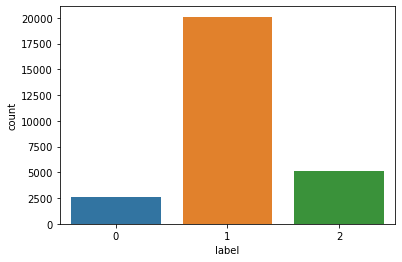

In [20]:
import seaborn as sns
sns.countplot('label',data=data)

# Cleaning the texts

In [21]:
#Creating a copy 
clean_reviews=data.copy()

In [22]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [23]:
data['text']=data['text'].apply(lambda x:review_cleaning(x))
data.head()

,text,label
0,rt mayasolovely as a woman you shouldnt compl...,2
1,rt boy dats coldtyga dwn bad for cuffin dat ...,1
2,rt urkindofbrand dawg rt you ever fuck a bit...,1
3,rt cganderson vivabased she look like a tranny,1
4,rt shenikaroberts the shit you hear about me ...,1


In [24]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [25]:
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df.head()


,text,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [26]:
#Separating input feature and label
X=data.text
y=data.label

# spliting the dataset for train and test

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 100)

# Transforming Dataset using TF-IDF Vectorizer

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Fit the TF-IDF Vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=25000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  25000


In [29]:
#Transform the data using TF-IDF Vectorizer
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [31]:
#Random Florest
y_pred_rf = classifier_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)
print(classification_report(y_test, y_pred_rf))

[[ 162  251   58]
 [ 146 3799  111]
 [  62  223  745]]
              precision    recall  f1-score   support

           0       0.44      0.34      0.39       471
           1       0.89      0.94      0.91      4056
           2       0.82      0.72      0.77      1030

    accuracy                           0.85      5557
   macro avg       0.71      0.67      0.69      5557
weighted avg       0.84      0.85      0.84      5557



In [32]:
from sklearn.neighbors import KNeighborsClassifier 
#apply knn algorithm
classifier= KNeighborsClassifier(n_neighbors=7)  
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test) 
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)

In [33]:
print(cm)

[[  28  133  310]
 [  29 1608 2419]
 [   7  239  784]]


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.06      0.10       471
           1       0.81      0.40      0.53      4056
           2       0.22      0.76      0.35      1030

    accuracy                           0.44      5557
   macro avg       0.49      0.41      0.33      5557
weighted avg       0.67      0.44      0.46      5557



In [35]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [36]:
#Decision Tree
y_pred_dt = classifier_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)
print(classification_report(y_test, y_pred_dt))

[[ 169  229   73]
 [ 227 3654  175]
 [ 114  146  770]]
              precision    recall  f1-score   support

           0       0.33      0.36      0.34       471
           1       0.91      0.90      0.90      4056
           2       0.76      0.75      0.75      1030

    accuracy                           0.83      5557
   macro avg       0.66      0.67      0.67      5557
weighted avg       0.83      0.83      0.83      5557



In [37]:
#naviebias
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_prednb = mnb.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_prednb, y_test)))
score_mnbt = round(accuracy_score(y_prednb,y_test)*100,2)

Accuracy : 0.790534


In [38]:
#SVC classifier
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
y_predsv = SVCmodel.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_predsv, y_test)))
score_svt = round(accuracy_score(y_predsv,y_test)*100,2)

Accuracy : 0.871154


In [39]:
#XGBOOST
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(max_depth=3,n_estimators=300,learning_rate=0.05)
    
xgb_clf.fit(X_train,y_train)
y_pred_XG = xgb_clf.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:51:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [40]:
print(confusion_matrix(y_test, y_pred_XG))
print(classification_report(y_test, y_pred_XG))
print(accuracy_score(y_test,y_pred_XG)*100)
score_svm = accuracy_score(y_test,y_pred_XG)*100

[[ 114  201  156]
 [  90 3660  306]
 [  23   67  940]]
              precision    recall  f1-score   support

           0       0.50      0.24      0.33       471
           1       0.93      0.90      0.92      4056
           2       0.67      0.91      0.77      1030

    accuracy                           0.85      5557
   macro avg       0.70      0.69      0.67      5557
weighted avg       0.85      0.85      0.84      5557

84.82994421450422


# CountVectorizer

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
# Create word vector (count)
CountVector = CountVectorizer(max_features=2000)

X = CountVector.fit_transform(data.text).toarray()
y = data.label.values

print(X.shape, y.shape)

(27782, 2000) (27782,)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=555)
print(f"X train data has shape {X_train.shape} and their label's shape {y_train.shape}")
print(f"X test data has shape {X_test.shape} and their label's shape {y_test.shape}")

X train data has shape (22225, 2000) and their label's shape (22225,)
X test data has shape (5557, 2000) and their label's shape (5557,)


In [43]:
#Predict using RandomForest
rf = RandomForestClassifier(random_state=555)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=555)

In [44]:
y_pred = rf.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))
score_rf = round(accuracy_score(y_pred,y_test)*100,2)

Accuracy : 0.855857


In [45]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_prednb = mnb.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_prednb, y_test)))
score_nb = round(accuracy_score(y_prednb,y_test)*100,2)

Accuracy : 0.837142


In [46]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train)
y_predlr = mnb.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_predlr, y_test)))
score_lr = round(accuracy_score(y_predlr,y_test)*100,2)

Accuracy : 0.837142


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=25)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=25)

In [48]:
y_preddt = tree_clf.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_preddt, y_test)))
score_dt = round(accuracy_score(y_preddt,y_test)*100,2)


Accuracy : 0.814468


In [49]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [50]:
y_predsv = SVCmodel.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_predsv, y_test)))
score_svt = round(accuracy_score(y_predsv,y_test)*100,2)

Accuracy : 0.847760


In [51]:
#XGBOOST
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(max_depth=3,n_estimators=300,learning_rate=0.05)
    
xgb_clf.fit(X_train,y_train)
y_pred_XG = xgb_clf.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:54:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [52]:
print(confusion_matrix(y_test, y_pred_XG))
print(classification_report(y_test, y_pred_XG))
print(accuracy_score(y_test,y_pred_XG)*100)
score_svm = accuracy_score(y_test,y_pred_XG)*100

[[  85  235  189]
 [  75 3643  288]
 [  18   67  957]]
              precision    recall  f1-score   support

           0       0.48      0.17      0.25       509
           1       0.92      0.91      0.92      4006
           2       0.67      0.92      0.77      1042

    accuracy                           0.84      5557
   macro avg       0.69      0.66      0.65      5557
weighted avg       0.83      0.84      0.83      5557

84.3080798992262


# Ensemble 

In [53]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

rfClf = RandomForestClassifier(n_estimators=500, random_state=0) # 500 trees.
svmClf = SVC(probability=True, random_state=0) # probability calculation
logClf = LogisticRegression(random_state=0)
#nbclf = GaussianNB(random_state=0)

# constructing the ensemble classifier by mentioning the individual classifiers.
clf2 = VotingClassifier(estimators = [('rf',rfClf), ('svm',svmClf), ('log', logClf)], voting='soft') 

# train the ensemble classifier
clf2.fit(X_train, y_train) 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=500,
                                                     random_state=0)),
                             ('svm', SVC(probability=True, random_state=0)),
                             ('log', LogisticRegression(random_state=0))],
                 voting='soft')

In [54]:
from sklearn.metrics import precision_score, accuracy_score
x_actual, x_pred = y_train, clf2.predict(X_train)

accuracy_score_VC_train = accuracy_score(x_actual, x_pred)

print('The accuracy score of Voting classifier on TRAIN is : ',round(accuracy_score_VC_train * 100,2), '%')

The accuracy score of Voting classifier on TRAIN is :  95.91 %


In [55]:
from sklearn.metrics import precision_score, accuracy_score
y_actual, y_pred = y_test, clf2.predict(X_test)

accuracy_score_VC_test = accuracy_score(y_actual, y_pred)

print('The accuracy score of Voting classifier on Test is : ',round(accuracy_score_VC_test * 100,2), '%')

The accuracy score of Voting classifier on Test is :  86.5 %


In [56]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

rfClf = RandomForestClassifier(n_estimators=500, random_state=0) # 500 trees.
svmClf = SVC(probability=True, random_state=0) # probability calculation
nbclf = GaussianNB()

# constructing the ensemble classifier by mentioning the individual classifiers.
clf2 = VotingClassifier(estimators = [('rf',rfClf), ('svm',svmClf), ('NB', nbclf)], voting='soft') 

# train the ensemble classifier
clf2.fit(X_train, y_train) 

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=500,
                                                     random_state=0)),
                             ('svm', SVC(probability=True, random_state=0)),
                             ('NB', GaussianNB())],
                 voting='soft')

In [57]:
from sklearn.metrics import precision_score, accuracy_score
y_actual, y_pred = y_test, clf2.predict(X_test)

accuracy_score_VC_test = accuracy_score(y_actual, y_pred)

print('The accuracy score of Voting classifier on Test is : ',round(accuracy_score_VC_test * 100,2), '%')

The accuracy score of Voting classifier on Test is :  84.04 %


In [58]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(max_depth=3,n_estimators=300,learning_rate=0.05)

#rfClf = RandomForestClassifier(n_estimators=500, random_state=0) # 500 trees.
svmClf = SVC(probability=True, random_state=0) # probability calculation
nbclf = GaussianNB()

# constructing the ensemble classifier by mentioning the individual classifiers.
clf2 = VotingClassifier(estimators = [('NB',nbclf), ('svm',svmClf), ('XB', xgb_clf)], voting='soft') 

# train the ensemble classifier
clf2.fit(X_train, y_train) 

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:02:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('NB', GaussianNB()),
                             ('svm', SVC(probability=True, random_state=0)),
                             ('XB',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            gamma=None, gpu_id=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.05,
                                            max_delta_step=None, max_depth=3,
                                            min_child_weight=None, missing=nan,
                                            monotone_const

In [59]:
from sklearn.metrics import precision_score, accuracy_score
y_actual, y_pred = y_test, clf2.predict(X_test)

accuracy_score_VC_test = accuracy_score(y_actual, y_pred)

print('The accuracy score of Voting classifier on Test is : ',round(accuracy_score_VC_test * 100,2), '%')

The accuracy score of Voting classifier on Test is :  82.85 %


In [61]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC


rfClf = RandomForestClassifier(n_estimators=500, random_state=0) # 500 trees.
svmClf = SVC(probability=True, random_state=0) # probability calculation


# constructing the ensemble classifier by mentioning the individual classifiers.
clf2 = VotingClassifier(estimators = [('rf',rfClf), ('svm',svmClf)], voting='soft') 

# train the ensemble classifier
clf2.fit(X_train, y_train) 

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=500,
                                                     random_state=0)),
                             ('svm', SVC(probability=True, random_state=0))],
                 voting='soft')

In [62]:
from sklearn.metrics import precision_score, accuracy_score
y_actual, y_pred = y_test, clf2.predict(X_test)

accuracy_score_VC_test = accuracy_score(y_actual, y_pred)

print('The accuracy score of Voting classifier on Test is : ',round(accuracy_score_VC_test * 100,2), '%')

The accuracy score of Voting classifier on Test is :  86.25 %


In [63]:
import pickle
filename = 'hindi.pkl'
pickle.dump(clf2, open(filename, 'wb'))

In [64]:
filename = 'vector.pkl'
pickle.dump(CountVector, open(filename, 'wb'))